In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
train_data = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test_data = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

In [4]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
# Checking target column 
np.unique(train_data.target, return_counts=True)

(array([0, 1]), array([4342, 3271]))

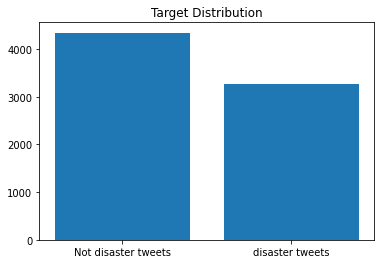

In [6]:
# Visualizing data distribution
target_count = train_data.groupby('target').size().reset_index(name='counts')
plt.bar(target_count.target, target_count.counts)
plt.xticks([0,1], labels=["Not disaster tweets", "disaster tweets"])
plt.title("Target Distribution")
plt.show()

# Data Cleaning and Preprocessing

In [7]:
def preprocess(reviews):
    tokenizer = RegexpTokenizer(r'\w+')
    review = str(reviews)
    review = review.lower()
    review = review.replace("<br /><br />", "")
    tokens = tokenizer.tokenize(review)

    stop_words = set(stopwords.words('english'))
    stopwords_removed = [i for i in tokens if i not in stop_words]

    ps = PorterStemmer()
    stem_text = [ps.stem(i) for i in stopwords_removed]

    cleaned_reviews = " ".join(stem_text)

    return cleaned_reviews

In [8]:
# CLeaning our training Data
X = train_data.text.apply(preprocess)
y = train_data.target

# Splitting the Data into Train and Test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), y, test_size=0.20, random_state=10)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6090,) (6090,)
(1523,) (1523,)


# Creating Model Pipeline

In [10]:
model1 = Pipeline([
    ('tfidf', TfidfVectorizer()), 
    ('mnb', MultinomialNB())
])
model2 = Pipeline([
    ('c_vec', CountVectorizer()), 
    ('mnb', MultinomialNB())
])
model3 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('bern', BernoulliNB())
])
model4 = Pipeline([
    ('c_vec', CountVectorizer()),
    ('bern', BernoulliNB())
])

In [11]:
# Fitting and training the model now
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)

Pipeline(steps=[('c_vec', CountVectorizer()), ('bern', BernoulliNB())])

In [12]:
print('Model 1 Train score', model1.score(X_train,y_train))
print('Model 1 Test score', model1.score(X_test,y_test))
print()
print('Model 2 Train score', model2.score(X_train,y_train))
print('Model 2 Test score', model2.score(X_test,y_test))
print()
print('Model 3 Train score', model3.score(X_train,y_train))
print('Model 3 Test score', model3.score(X_test,y_test))
print()
print('Model 4 Train score', model4.score(X_train,y_train))
print('Model 4 Test score', model4.score(X_test,y_test))

Model 1 Train score 0.9018062397372743
Model 1 Test score 0.7866053841103086

Model 2 Train score 0.9187192118226601
Model 2 Test score 0.7852921864740644

Model 3 Train score 0.8957307060755336
Model 3 Test score 0.7918581746552856

Model 4 Train score 0.8957307060755336
Model 4 Test score 0.7918581746552856


# Visualizing the accuracy from the models

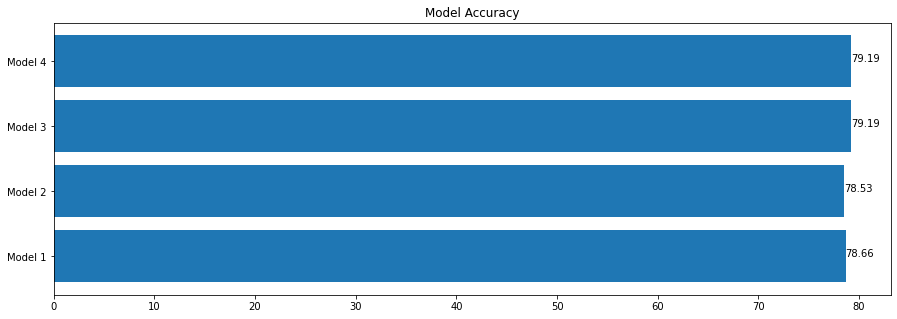

In [13]:
models = {'Model 1': model1.score(X_test,y_test),
          'Model 2': model2.score(X_test,y_test),
          'Model 3': model3.score(X_test,y_test),
          'Model 4': model4.score(X_test,y_test)
         }
keys = [i for i in models.keys()]
#print(keys)
values = [i*100 for i in models.values()]
#print(values)
plt.figure(figsize=(15,5))
plt.barh(keys, values)
  
for index, value in enumerate(values):
    plt.text(value, index,
             str("%.2f"%value))
plt.title("Model Accuracy")
plt.show()

### We can conclude that Model 3 and Model 4 are giving the best accuracy of 79.19%

# Predicting on Test data

In [14]:
# Cleaning the test data
test_set = test_data.text.apply(preprocess)

In [15]:
pred = model3.predict(test_set)

In [16]:
# Creating a new DataFrame for submission
submission_df = pd.DataFrame(list(zip(test_data.iloc[:,0],pred)), columns=['id', 'target'])

In [17]:
submission_df.to_csv('submission.csv', index=False)